2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

2.2 Data preparation

In [2]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
#!wget $data

In [4]:
df= pd.read_csv('data.csv')

In [5]:
# Change the index (title) of all the columns to lowercase and replace spaces with underscores.
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
# Change all string values of each columns as the previous cell
# First it takes all index with string values using df.dtypes =='object'
# Then, create a list from that index.
strings = list(df.dtypes[df.dtypes =='object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


2.3 Exploratory Data Analysis

The goal is to understand how the data looks by visualizing the distribution and seeing the mission values.

In [8]:
# See the unique values for each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #print the first five unique values of each column
    print("The number of unique values:", df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
The number of unique values: 48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
The number of unique values: 914

year
[2011 2012 2013 1992 1993]
The number of unique values: 28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
The number of unique values: 10

engine_hp
[335. 300. 230. 320. 172.]
The number of unique values: 356

engine_cylinders
[ 6.  4.  5.  8. 12.]
The number of unique values: 9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
The number of unique values: 5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
The number of unique values: 4

number_of_doors
[ 2.  4.  3. nan]
The number of unique values: 3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
T

Visualisation of the distribution of the car price

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

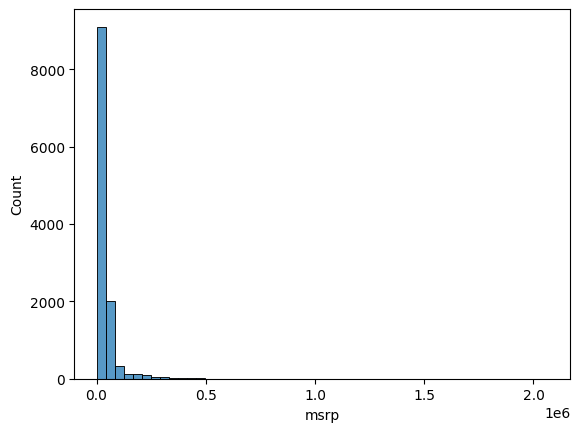

In [10]:
#Look at the price distribution.
sns.histplot(df.msrp, bins = 50)

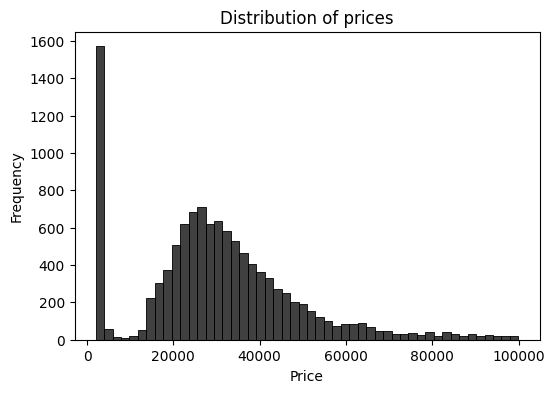

In [11]:
#avoid the long-tail distribution and looking at the value less than 100 000
plt.figure(figsize=(6, 4))
sns.histplot(df.msrp[df.msrp < 100000], bins = 50, color = 'black')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

<Axes: xlabel='msrp', ylabel='Count'>

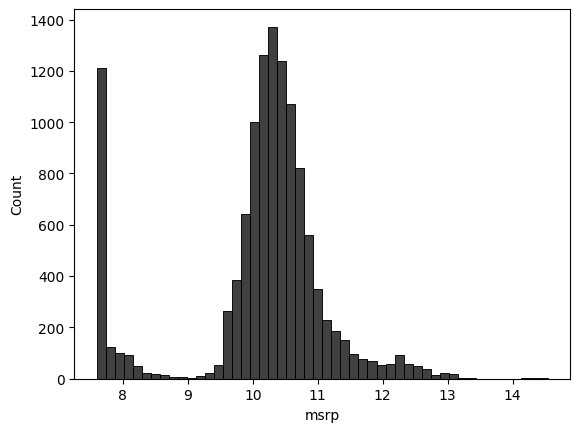

In [12]:
#To have a normal distribution, we apply la logarithmto the price.
# But if , in case,the value is 0, we ggetan error.
# # The solution is to apply log(value+1) -> np.log1p

log_price = np.log1p(df.msrp)
sns.histplot(log_price, bins = 50, color = 'black')

Looking at missing values

In [13]:
#Check the mission values and sum to get the number
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

2.4 Setting up the validation framework

In [14]:
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n , n_val+n_test+n_train
# Output: (11914, 11914)
 
# sizes of our dataframes
n_val, n_test, n_train
# Output:  (2382, 2382, 7150)
 
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [15]:
df_val[:10]
#After analyzing, this approach has a crucial problem. It's sequential.
# # We need to shuffle (mix) the dataset. 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
7155,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,73645
7156,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,74260
7157,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,66770
7158,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,71260
7159,lincoln,navigator,2017,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560


In [16]:
#Mixe or shuffle the idx values to avoid sequential. 
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [18]:
df_val[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
7587,toyota,pickup,1995,regular_unleaded,116.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,25,19,2031,2000
7035,nissan,murano,2016,regular_unleaded,260.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,28,21,2009,34400
892,saab,900,1996,regular_unleaded,185.0,4.0,manual,front_wheel_drive,2.0,"luxury,performance",compact,convertible,26,18,376,2000
4911,land_rover,freelander,2004,regular_unleaded,174.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",compact,4dr_suv,19,16,258,25330
10011,dodge,stratus,2004,regular_unleaded,200.0,6.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,25,17,1851,22370


In [19]:
#in the previous cell the index is non-ordered.
# The index is now reset.

df_train = df_train.reset_index(drop= True)
df_val= df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop=True)

df_val[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [20]:
# Prepare the target for training, validation, and testing
# It consists of taking all msrp and applying the log1p
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [21]:
#remove the msrp values because it is not part of the features dataset.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

2.5 Linear regression

In [22]:
# A linear regression is an ML model to predic a numerical values from a linear relation with fetures.
# Yi= b+ Wi*Xi
# So it takes Xi as features input and produce the predicted values Yi
# the index 'i' represent each car.
b=23

def linear_regression(x):
    n= len(x)
    w = np.ones(n)
    result = b
    for i in range(n):
        result = result + w[i]*x[i]
    return result

2.6 Linear regression: vector form

In [23]:
# Yi= b+ XiT*Wi
b=23

def linear_regression(x):
    n= len(x)
    w = np.ones(n)
    x = x.T
    result = b
    for i in range(n):
        result = result + x.dot(w)
    return result

2.7 Training linear regression: Normal equation

The Training objective is to find the value of W and b that represent well the model.

In [24]:
# The goal is to find W that sove the equation of Xi*Wi = Y
# XT*Xi*Wi = XT*Y
#  XT*Xi is GRAMM Matrix
# (XT*Xi)-1*XT*Xi*Wi = (XT*Xi)-1*XT*Y
# W = (XT*Xi)-1*XT*Y

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

2.8 Baseline model for car price prediction project

In [25]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [26]:
# As we use numerical value for the calculation of W.
#Let's take the int and float value as baseline.

# the code extract all int and float.
base = list(df_train.dtypes[df_train.dtypes !='object'].index)
base

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [27]:
# Create a baseline features
X_train = df_train[base].values
X_train[:5]

array([[2.008e+03, 1.480e+02, 4.000e+00, 2.000e+00, 3.300e+01, 2.400e+01,
        1.385e+03],
       [2.012e+03, 1.320e+02, 4.000e+00, 4.000e+00, 3.200e+01, 2.500e+01,
        2.031e+03],
       [2.016e+03, 1.480e+02, 4.000e+00, 4.000e+00, 3.700e+01, 2.800e+01,
        6.400e+02],
       [1.991e+03, 9.000e+01, 4.000e+00, 3.000e+00, 1.800e+01, 1.600e+01,
        8.730e+02],
       [2.017e+03, 3.850e+02, 8.000e+00, 4.000e+00, 2.100e+01, 1.500e+01,
        5.657e+03]])

In [28]:
#check the mission values in the features 
df_train[base].isnull().sum()

year                 0
engine_hp           40
engine_cylinders    14
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [29]:
df_train[base] = df_train[base].fillna(df_train[base].median())
df_train[base].isnull().sum()
X_train = df_train[base].values #creat an array from values
X_train[:5]

array([[2.008e+03, 1.480e+02, 4.000e+00, 2.000e+00, 3.300e+01, 2.400e+01,
        1.385e+03],
       [2.012e+03, 1.320e+02, 4.000e+00, 4.000e+00, 3.200e+01, 2.500e+01,
        2.031e+03],
       [2.016e+03, 1.480e+02, 4.000e+00, 4.000e+00, 3.700e+01, 2.800e+01,
        6.400e+02],
       [1.991e+03, 9.000e+01, 4.000e+00, 3.000e+00, 1.800e+01, 1.600e+01,
        8.730e+02],
       [2.017e+03, 3.850e+02, 8.000e+00, 4.000e+00, 2.100e+01, 1.500e+01,
        5.657e+03]])

The function for the baseline preparation values

In [30]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())  # Fill NaN with column mean
    X = df_num.values
    return X

Data baseline preparation

In [31]:
X_train = prepare_X(df_train)

Training

In [32]:
b,w = train_linear_regression(X_train,y_train)

In [33]:
y_pred = X_train.dot(w)+b

<Axes: ylabel='Count'>

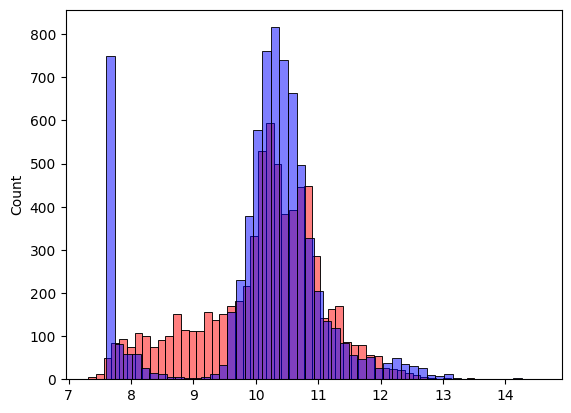

In [34]:
# alpha changes the transparency of the bars
# # bins specifies the number of bars
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predicted')
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='Actual')

2.9 Root Mean Squared Error (RMSE)

In [35]:
def rmse(y_prd,y_real):
    se = (y_real - y_prd) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [36]:
rmse(y_pred,y_train)

np.float64(0.5117635878216088)

2.10 Computing RMSE on validation data

In [37]:
X_val = prepare_X(df_val)
y_val_predict= X_val.dot(w) + b

rmse(y_val_predict, y_val)

np.float64(0.5067389698376598)

2.11 Feature engineering

Create a feature age of the car was included in the dataset, obtained with the subtraction of the maximum year of cars and each of the years of cars.

In [38]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    features.remove('year')

    df['age']= df.year.max() - df.year
    
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())  # Fill NaN with column mean
    X = df_num.values
    return X

In [39]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

y_pred = b + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_val_pred = b + X_val.dot(w)
print('validation', rmse(y_val, y_val_pred))

train 0.5117635878216082
validation 0.5067389698373703


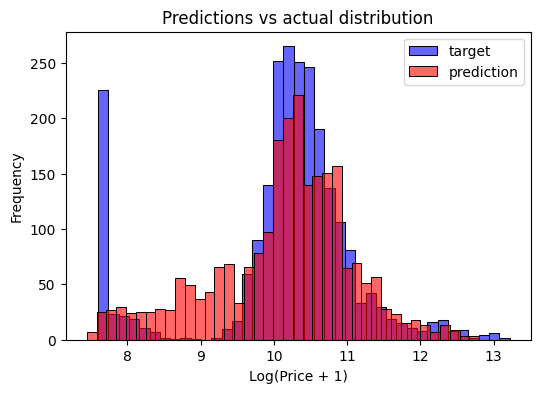

In [40]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='red', alpha=0.6, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

2.12 Categorical variables

The goal is to change any objects features and the number_of_doors to a bunch of binary columns – so called one-hot encoding.

In [41]:
#take all column with string values
#expect model because each make has its different model
categorical_variables = list(df_train.dtypes[df_train.dtypes =='object'].index)
categorical_variables.remove('model')

# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
     

In [42]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    features.remove('year')

    df['age']= df.year.max() - df.year
    
    features.append('age')

    features.remove('number_of_doors')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())  # Fill NaN with column mean
    X = df_num.values
    return X

In [43]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

y_pred = b + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_val_pred = b + X_val.dot(w)
print('validation', rmse(y_val, y_val_pred))

train 356.47770843766796
validation 358.742991781372


2.13 Regularization in the training part

Previsouly, the error is so big. Now it's time to do some regularisation.

Regularization keeps the model stable, less sensitive to noise, and better at generalizing by slightly penalizing large weights.

Functionality

It adds a small constant (r) to the diagonal of the matrix XTX + rI; in the training part
where:
I = Identity matrix (1s on diagonal)
r = small positive constant (like 0.01)

This makes the matrix invertible, even if some features are duplicated or highly correlated.

It reduces large weight values, keeping the model simpler and more generalizable.

In [54]:
def train_linear_regression(X, y, r=0.001): 
    #the bestis to find the approriate r for the model
    # Add a column of ones for the bias term
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Compute the Gram matrix
    XTX = X.T.dot(X)

    # Add regularization to the diagonal
    XTX = XTX + r * np.eye(XTX.shape[0])

    # Invert the regularized matrix
    XTX_inv = np.linalg.inv(XTX)

    # Compute weights
    w = XTX_inv.dot(X.T).dot(y)

    # Separate bias and feature weights
    
    return w[0], w[1:]

In [55]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

y_pred = b + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_val_pred = b + X_val.dot(w)
print('validation', rmse(y_val, y_val_pred))

#Now we see that the error is smaller
# previsou train error 0.5117635878216082 and actual after regularisation 0.460045016570938

train 0.460045016570938
validation 0.4549634790421037
